In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

## Download do dataset

In [2]:
# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
df = pd.read_csv('cel_train.csv')

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Separação dos conjuntos de treino e teste

In [5]:
y = df['price_range']
X = df.drop(columns='price_range')

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Criação e visualização do modelo

Principais hiperparâmetros do modelo:
<ul>
<li><b>class_wheigth</b> = None. Pesos das classes definidas em um dicionário. 'balanced' irá definir os pesos de forma inversamente proporcional à suas frequências no conjunto;
<li><b>criterion</b> = 'gini' (padrão) ou 'entropy'. Critério de separação explicado;
<li><b>max_depth</b> = None. Profundidade máxima da árvore. O default fará a árvore ser construída até que as folhas contenham menos que <b>min_samples_split</b>;
<li><b>min_samples_split</b> = 2. Número mínimo de amostras exigido para separar um nó;
<li><b>max_features</b> = None. Máximo de atributos a serem analisados para a separação. O default são todos;
<li><b>max_leaf_nodes</b> = None. Define um máximo de folhas;
<li><b>random_state</b> = None. Semente aleatória;
<li><b>splitter</b> = 'best' (padrão) ou 'random'.
</ul>

O ajuste do hiperparâmetro **max_depth** é o mais decisivo para deixar o modelo com underfitting (muito baixa) ou overfitting (muito alta ou sem limite).

In [14]:
best = {'best_depth': -1, 'best_score': -10 }

for i in range(5,15):
   model = DecisionTreeClassifier(
    random_state=42, max_depth=i
   )
   model.fit(X_train, y_train)
   score = model.score(X_test, y_test)
   if score > best['best_score']: 
     best["best_depth"] =  i
     best['best_score'] = score
     print(score, i)
     

model = DecisionTreeClassifier(
    random_state=42, max_depth= best['best_depth']
   )

model.fit(X_train, y_train)
print(best)

   



0.794 5
0.81 6
0.83 8
{'best_depth': 8, 'best_score': 0.83}


In [15]:
model.score(X_test, y_test)

0.83

## Análise do modelo

Atributos do modelo após o treino:
<ul>
<li><b>classes_</b>: Rótulo das classes;
<li><b>feature_importances_</b>: Matriz de importâncias de Gini;
<li><b>n_classes_</b>: Número de classes;
<li><b>n_features_</b>: Número de atributos;
<li><b>tree_</b>: Objeto da árvore.
</ul>

In [8]:
for col, val in sorted(
    zip(X.columns, model.feature_importances_),
    key=lambda x: x[1],
    reverse=True
):
    print(f'{col:13}{val:10.3f}')

ram               0.663
battery_power     0.138
px_height         0.084
px_width          0.066
mobile_wt         0.012
talk_time         0.009
int_memory        0.006
clock_speed       0.005
fc                0.004
n_cores           0.004
sc_w              0.003
pc                0.003
m_dep             0.002
sc_h              0.002
touch_screen      0.001
blue              0.000
dual_sim          0.000
four_g            0.000
three_g           0.000
wifi              0.000


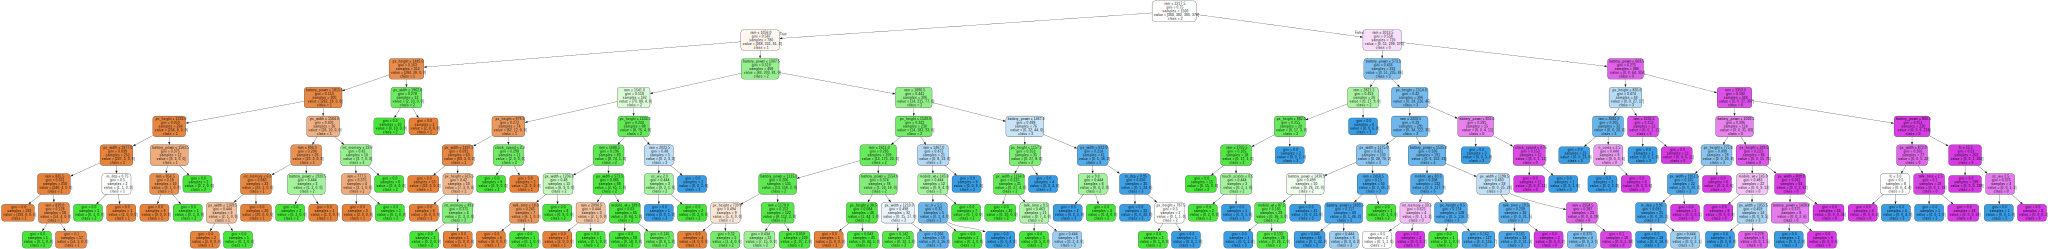

In [9]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(c) for c in y.unique()],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=False, format='png')

Image(filename="decision_tree.png")
display(graph)

## Teste de hiperparâmetro

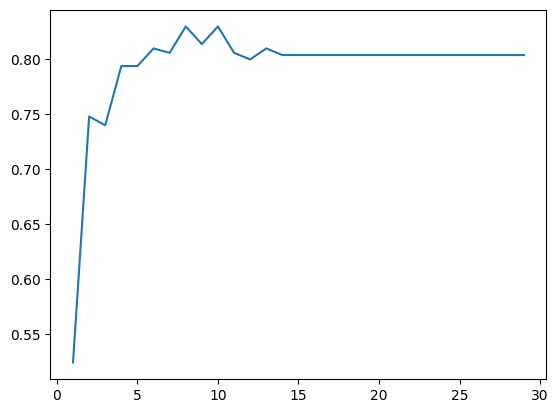

In [10]:
import matplotlib.pyplot as plt

s = []
for i in range(1, 30):
    m = DecisionTreeClassifier(random_state=42, max_depth=i)
    m.fit(X_train, y_train)
    s.append(m.score(X_test, y_test))

plt.plot(list(range(1, 30)), s)